In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

%load_ext autoreload
%autoreload 2


from utils import get_percentage_of_image, normalize_image
import torch.nn.functional as F
import torch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
MODEL_TYPE = "simple_cnn"
XAI_TYPE = "lime"

BASE_DIR = "data/"
DATASET = "atsds_large"
DATASET_SPLIT = "test"
GROUND_TRUTH_DIR = BASE_DIR + DATASET + "_mask/" + DATASET_SPLIT
BACKGROUND_DIR = BASE_DIR + DATASET + "_background/" + DATASET_SPLIT
DATASET_DIR = BASE_DIR + DATASET + "/" + DATASET_SPLIT
XAI_DIR = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + XAI_TYPE + "/" + DATASET_SPLIT + "/"
ADV_FOLDER = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + XAI_TYPE + "/occlusion/"

In [18]:
IMAGES_PATH = 'data/' + DATASET + '/' + DATASET_SPLIT + '/'
# Define our Categories
CATEGORIES = sorted(os.listdir(IMAGES_PATH))
print(CATEGORIES)
class_to_dataset_class_dict = {}
for cat in CATEGORIES:
    class_to_dataset_class_dict[cat] = cat
label_idx_dict = {}
for count,cat in enumerate(CATEGORIES):
    label_idx_dict[cat] = count

imagedict = {}
for cat in CATEGORIES:
    imagedict[cat] = []
    imagelist = os.listdir(IMAGES_PATH + cat + "/")
    for im in imagelist:
        imagedict[cat].append(im)            

['00001', '00002', '00003', '00004', '00005', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00017', '00018', '00025', '00031', '00035', '00038']


In [19]:
im1_raw = np.load(XAI_DIR + "00001/mask/000035.png.npy")

im2_raw = Image.open(GROUND_TRUTH_DIR + "/00001/000035.png")
im3_raw = Image.open(BACKGROUND_DIR + "/00001/000035.png")
im4_raw = Image.open(DATASET_DIR + "/00001/000035.png")
im1 = np.array(np.array(im1_raw))
im4 = np.array(im4_raw)
im3 = np.array(im3_raw)
im2 = np.array(im2_raw)/255
im2_gs = np.array(im2_raw.convert('L'))

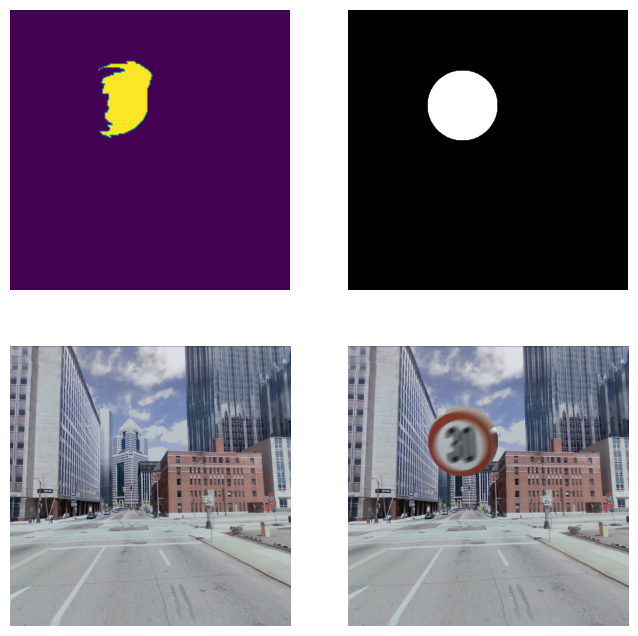

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].imshow(im1)
axes[0, 0].axis('off')  # remove axis

axes[0, 1].imshow(im2)
axes[0, 1].axis('off')  # remove axis

axes[1, 0].imshow(im3)
axes[1, 0].axis('off')  # remove axis

axes[1, 1].imshow(im4)
axes[1, 1].axis('off')  # remove axis

plt.show()


In [21]:
for pct in range(10,101,10):
    print(pct)
    for cat in CATEGORIES:
        if not os.path.isdir(ADV_FOLDER + str(pct) + "/test/" + cat + "/"):
            os.makedirs(ADV_FOLDER + str(pct) + "/test/" + cat + "/")
        images = imagedict[cat]
        for imagename in images:
            current_img = normalize_image(np.array(Image.open(IMAGES_PATH + cat  + "/" + imagename)))
            current_background = normalize_image(np.array(Image.open(BACKGROUND_DIR + "/" + cat + "/" + imagename)))
            xai_mask = np.load(XAI_DIR + cat + "/grad_mask/" + imagename + ".npy")
            #if (xai_mask.shape != (512,512)):
                # Convert numpy array to PyTorch tensor
            #    xai_mask_tensor = torch.tensor(xai_mask, dtype=torch.float32)
                # Ensure the tensor has a batch dimension and channel dimension
            #    if xai_mask_tensor.ndim == 2:  # If it's a single grayscale image 
            #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
            #    elif xai_mask_tensor.ndim == 3:  # If it has channels
            #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0)  # Add batch dimension
                # Resize xai_mask_tensor to (512, 512) using bilinear interpolation
            #    resized_xai_mask = F.interpolate(xai_mask_tensor, size=(512, 512), mode='bilinear', align_corners=False)
            #    xai_mask = np.array(resized_xai_mask)
            adv_mask = normalize_image(get_percentage_of_image(np.ones_like(current_img),xai_mask,(pct/10)))
            adv_example = np.where(adv_mask == 0, current_img, current_background)
            adv_example_save = Image.fromarray((adv_example*255).astype('uint8'))
            adv_example_save.save(ADV_FOLDER + str(pct) + "/test/" + cat + "/" + imagename)


10
20
30
40
50
60
70
80
90
100


In [14]:
#MODEL_TYPE = "convnext_tiny"
XAI_TYPE = "ig_fixpoints"

BASE_DIR = "data/"
DATASET = "atsds_large"
DATASET_SPLIT = "test"
GROUND_TRUTH_DIR = BASE_DIR + DATASET + "_mask/" + DATASET_SPLIT
BACKGROUND_DIR = BASE_DIR + DATASET + "_background/" + DATASET_SPLIT
DATASET_DIR = BASE_DIR + DATASET + "/" + DATASET_SPLIT
XAI_DIR = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + XAI_TYPE + "/" + DATASET_SPLIT + "/"
ADV_FOLDER = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + XAI_TYPE + "/occlusion/"

In [15]:
for pct in range(10,101,10):
    print(pct)
    for cat in CATEGORIES:
        if not os.path.isdir(ADV_FOLDER + str(pct) + "/test/" + cat + "/"):
            os.makedirs(ADV_FOLDER + str(pct) + "/test/" + cat + "/")
        images = imagedict[cat]
        for imagename in images:
            current_img = normalize_image(np.array(Image.open(IMAGES_PATH + cat  + "/" + imagename)))
            current_background = normalize_image(np.array(Image.open(BACKGROUND_DIR + "/" + cat + "/" + imagename)))
            xai_mask = np.load(XAI_DIR + cat + "/grad_mask/" + imagename + ".npy")
            #if (xai_mask.shape != (512,512)):
                # Convert numpy array to PyTorch tensor
            #    xai_mask_tensor = torch.tensor(xai_mask, dtype=torch.float32)
                # Ensure the tensor has a batch dimension and channel dimension
            #    if xai_mask_tensor.ndim == 2:  # If it's a single grayscale image 
            #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
            #    elif xai_mask_tensor.ndim == 3:  # If it has channels
            #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0)  # Add batch dimension
                # Resize xai_mask_tensor to (512, 512) using bilinear interpolation
            #    resized_xai_mask = F.interpolate(xai_mask_tensor, size=(512, 512), mode='bilinear', align_corners=False)
            #    xai_mask = np.array(resized_xai_mask)
            adv_mask = normalize_image(get_percentage_of_image(np.ones_like(current_img),xai_mask,(pct/10)))
            adv_example = np.where(adv_mask == 0, current_img, current_background)
            adv_example_save = Image.fromarray((adv_example*255).astype('uint8'))
            adv_example_save.save(ADV_FOLDER + str(pct) + "/test/" + cat + "/" + imagename)


10
20
30
40
50
60
70
80
90
100


In [27]:
xai_methods = ["lime","prism","ig_fixpoints","xrai","gradcam"]
MODEL_TYPE = "vgg16"

In [28]:
for xai_m in xai_methods:
#MODEL_TYPE = "convnext_tiny"
    BASE_DIR = "data/"
    DATASET = "atsds_large"
    DATASET_SPLIT = "test"
    GROUND_TRUTH_DIR = BASE_DIR + DATASET + "_mask/" + DATASET_SPLIT
    BACKGROUND_DIR = BASE_DIR + DATASET + "_background/" + DATASET_SPLIT
    DATASET_DIR = BASE_DIR + DATASET + "/" + DATASET_SPLIT
    XAI_DIR = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + xai_m + "/" + DATASET_SPLIT + "/"
    ADV_FOLDER = BASE_DIR + "auswertung/" + MODEL_TYPE + "/" + xai_m + "/occlusion/"

    for pct in range(10,101,10):
        print(xai_m + " " + str(pct))
        for cat in CATEGORIES:
            if not os.path.isdir(ADV_FOLDER + str(pct) + "/test/" + cat + "/"):
                os.makedirs(ADV_FOLDER + str(pct) + "/test/" + cat + "/")
            images = imagedict[cat]
            for imagename in images:
                current_img = normalize_image(np.array(Image.open(IMAGES_PATH + cat  + "/" + imagename)))
                current_background = normalize_image(np.array(Image.open(BACKGROUND_DIR + "/" + cat + "/" + imagename)))
                xai_mask = np.load(XAI_DIR + cat + "/grad_mask/" + imagename + ".npy")
                #if (xai_mask.shape != (512,512)):
                    # Convert numpy array to PyTorch tensor
                #    xai_mask_tensor = torch.tensor(xai_mask, dtype=torch.float32)
                    # Ensure the tensor has a batch dimension and channel dimension
                #    if xai_mask_tensor.ndim == 2:  # If it's a single grayscale image 
                #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
                #    elif xai_mask_tensor.ndim == 3:  # If it has channels
                #        xai_mask_tensor = xai_mask_tensor.unsqueeze(0)  # Add batch dimension
                    # Resize xai_mask_tensor to (512, 512) using bilinear interpolation
                #    resized_xai_mask = F.interpolate(xai_mask_tensor, size=(512, 512), mode='bilinear', align_corners=False)
                #    xai_mask = np.array(resized_xai_mask)
                adv_mask = normalize_image(get_percentage_of_image(np.ones_like(current_img),xai_mask,(pct/10)))
                adv_example = np.where(adv_mask == 0, current_img, current_background)
                adv_example_save = Image.fromarray((adv_example*255).astype('uint8'))
                adv_example_save.save(ADV_FOLDER + str(pct) + "/test/" + cat + "/" + imagename)


lime 10
lime 20
lime 30
lime 40
lime 50
lime 60
lime 70
lime 80
lime 90
lime 100
prism 10
prism 20
prism 30
prism 40
prism 50
prism 60
prism 70
prism 80
prism 90
prism 100
ig_fixpoints 10
ig_fixpoints 20
ig_fixpoints 30
ig_fixpoints 40
ig_fixpoints 50
ig_fixpoints 60
ig_fixpoints 70
ig_fixpoints 80
ig_fixpoints 90
ig_fixpoints 100
xrai 10
xrai 20
xrai 30
xrai 40
xrai 50
xrai 60
xrai 70
xrai 80
xrai 90
xrai 100
gradcam 10
gradcam 20
gradcam 30
gradcam 40
gradcam 50
gradcam 60
gradcam 70
gradcam 80
gradcam 90
gradcam 100
